# Perceptron Learning Phishing Email Classification

In [1]:
from urllib.request import urlopen
import numpy as np
import pandas as pd

## Reading the Data

In [2]:
def parse_row(line, len_row):
    row = np.zeros(len_row)
    for i, value in enumerate(line.split(",")):
        row[i] = int(value)
    return row

num_cols = 0
columns = []
rows = []
len_attr = len('@attribute')


with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff") as f:
    for line in f:
        line = line.decode('utf-8')
        if line.startswith(("-1","0","1")):
            rows.append(parse_row(line, num_cols))
        elif line.startswith("@attribute "):
            col_name = line[len_attr:line.find("{}")].strip().split()[0]
            columns.append(col_name)
            num_cols += 1
        
df = pd.DataFrame(data=rows, columns=columns)

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,-1.0
2,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
3,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
4,1.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0


## Initial Summary Statistics

In [3]:
df.shape

(11055, 31)

In [4]:
df.describe().loc[["mean", "std", "50%"]].T.rename(columns={"50%" : "median"})

,mean,std,median
having_IP_Address,0.313795,0.949534,1.0
URL_Length,-0.633198,0.766095,-1.0
Shortining_Service,0.738761,0.673998,1.0
having_At_Symbol,0.700588,0.713598,1.0
double_slash_redirecting,0.741474,0.671011,1.0
Prefix_Suffix,-0.734962,0.678139,-1.0
having_Sub_Domain,0.063953,0.817518,0.0
SSLfinal_State,0.250927,0.911892,1.0
Domain_registeration_length,-0.336771,0.941629,-1.0
Favicon,0.628584,0.777777,1.0


In [5]:
df.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


For specific information on how these categorical variables were determined, refer to the "Phishing Website Features" file.

## ML Setup

In [77]:
num_examples = df.shape[0]
num_features = df.shape[1] - 1

# 80-10-10 data split
train, validate, test = np.split(df.sample(frac=1), [int(.8*num_examples), int(.9*num_examples)])

train_data, train_labels  = train.iloc[:,:num_features].reset_index(drop=True), train.iloc[:,30:].reset_index(drop=True)
dev_data, dev_labels  = validate.iloc[:,:num_features].reset_index(drop=True), validate.iloc[:,30:].reset_index(drop=True)
test_data, test_labels  = test.iloc[:,:num_features].reset_index(drop=True), test.iloc[:,30:].reset_index(drop=True)

## Training Simple Model

In [78]:
%run Perceptron.py

In [79]:
PhishingSimplePerceptron = SimplePerceptron(num_features, epochs=50)
SimpleWeights, SimpleBias = PhishingSimplePerceptron.train(train_data, train_labels, dev_data, dev_labels)

## Graphing Performance

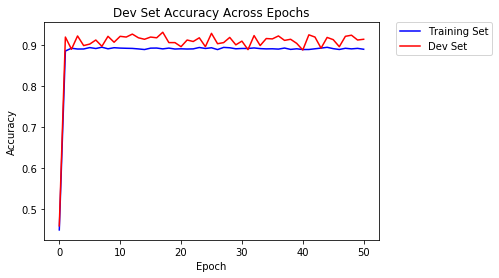

In [80]:
PhishingSimplePerceptron.graph()

## Test Set Accuracy

In [81]:
PhishingSimplePerceptron.test(test_data, test_labels)

0.8896925858951176

In [ ]:
#PhishingDynamicPerceptron = DynamicPerceptron(num_features, epochs=100)
#DynamicWeights  = PhishingDynamicPerceptron.train(train_data, train_labels)[0]

In [ ]:
#PhishingMarginPerceptron = MarginPerceptron(num_features, epochs=100)
#MarginWeights, Margin  = PhishingMarginPerceptron.train(train_data, train_labels)[0]

In [ ]:
#PhishingAveragedPerceptron = AveragedPerceptron(num_features, epochs=100)
#AveragedWeights = PhishingAveragedPerceptron.train(train_data, train_labels)[0]

In [ ]:
#PhishingAggressiveMarginPerceptron = AggressiveMarginPerceptron(num_features, epochs=100)
#AggressiveMarginWeights = PhishingAggressiveMarginPerceptron.train(train_data, train_labels)[0]

In [ ]:
#PhishingSimplePerceptron.test(test_data, test_labels)
#PhishingDynamicPerceptron.test(test_data, test_labels)
#PhishingMarginPerceptron.test(test_data, test_labels)
#PhishingAveragedPerceptron.test(test_data, test_labels)
#PhishingAggressiveMarginPerceptron.test(test_data, test_labels)